<a href="https://colab.research.google.com/github/HyeonuJeong/Mycakd5/blob/main/rq_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kakaobrain/rq-vae-transformer

fatal: destination path 'rq-vae-transformer' already exists and is not an empty directory.


In [ ]:
%cd /content/rq-vae-transformer

/content/rq-vae-transformer


In [ ]:
pip install -r requirements.txt

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-_ilsbzp5
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-_ilsbzp5


In [ ]:
import sys
sys.path.append('/content/rq-vae-transformer/rqvae') # 업로드 할 경로
sys.path.append('/content/rq-vae-transformer/notebooks') # 업로드 할 경로
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/rq-vae-transformer/rqvae', '/content/rq-vae-transformer/notebooks']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import yaml
import torch
import torchvision
import clip
import torch.nn.functional as F

from notebook_utils import TextEncoder, load_model, get_generated_images_by_texts

In [ ]:
%mkdir /content/data
%cd /content/data

!wget https://arena.kakaocdn.net/brainrepo/models/RQVAE/dcd95e8f08408e113aab6451fae895f5/cc3m.tar.gz
!tar -zxvf cc3m.tar.gz

vqvae_path = '/content/data/cc3m/stage1/model.pt'
model_vqvae, _ = load_model(vqvae_path)

model_path = '/content/data/cc3m/stage2/model.pt'
model_ar, config = load_model(model_path, ema=False)

model_ar = model_ar.cuda().eval()
model_vqvae = model_vqvae.cuda().eval()

model_clip, preprocess_clip = clip.load("ViT-B/32", device='cpu')
model_clip = model_clip.cuda().eval()

text_encoder = TextEncoder(tokenizer_name=config.dataset.txt_tok_name, 
                           context_length=config.dataset.context_length)

mkdir: cannot create directory ‘/content/data’: File exists
/content/data
--2022-05-16 07:45:53--  https://arena.kakaocdn.net/brainrepo/models/RQVAE/dcd95e8f08408e113aab6451fae895f5/cc3m.tar.gz
Resolving arena.kakaocdn.net (arena.kakaocdn.net)... 203.217.239.86
Connecting to arena.kakaocdn.net (arena.kakaocdn.net)|203.217.239.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2831047122 (2.6G) [application/gzip]
Saving to: ‘cc3m.tar.gz’

cc3m.tar.gz         100%[===================>]   2.64G  11.7MB/s    in 3m 56s  

2022-05-16 07:49:51 (11.5 MB/s) - ‘cc3m.tar.gz’ saved [2831047122/2831047122]



In [ ]:
# %mkdir /content/data
# %cd /content/data

# !wget https://arena.kakaocdn.net/brainrepo/models/RQVAE/d47570aeff6ba300735606a806f54663/ffhq.tar.gz
# !tar -zxvf ffhq.tar.gz

# vqvae_path = '/content/data/ffhq/stage1/model.pt'
# model_vqvae, _ = load_model(vqvae_path)

# model_path = '/content/data/ffhq/stage2/model.pt'
# model_ar, config = load_model(model_path, ema=False)

# model_ar = model_ar.cuda().eval()
# model_vqvae = model_vqvae.cuda().eval()

# model_clip, preprocess_clip = clip.load("ViT-B/32", device='cpu')
# model_clip = model_clip.cuda().eval()

# text_encoder = TextEncoder(tokenizer_name=config.dataset.txt_tok_name, 
#                            context_length=config.dataset.context_length)

--2022-05-16 08:21:42--  https://arena.kakaocdn.net/brainrepo/models/RQVAE/d47570aeff6ba300735606a806f54663/ffhq.tar.gz
Resolving arena.kakaocdn.net (arena.kakaocdn.net)... 203.217.239.86
Connecting to arena.kakaocdn.net (arena.kakaocdn.net)|203.217.239.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1692477336 (1.6G) [application/gzip]
Saving to: ‘ffhq.tar.gz’

ffhq.tar.gz         100%[===================>]   1.58G  11.3MB/s    in 2m 26s  

2022-05-16 08:24:10 (11.0 MB/s) - ‘ffhq.tar.gz’ saved [1692477336/1692477336]

ffhq/
ffhq/stage1/
ffhq/stage1/model.pt
ffhq/stage1/config.yaml
ffhq/stage2/
ffhq/stage2/config.yaml
ffhq/stage2/.ipynb_checkpoints/
ffhq/stage2/.ipynb_checkpoints/config-checkpoint.yaml
ffhq/stage2/model.pt


Sampling: 100%|██████████| 256/256 [00:06<00:00, 38.85it/s]


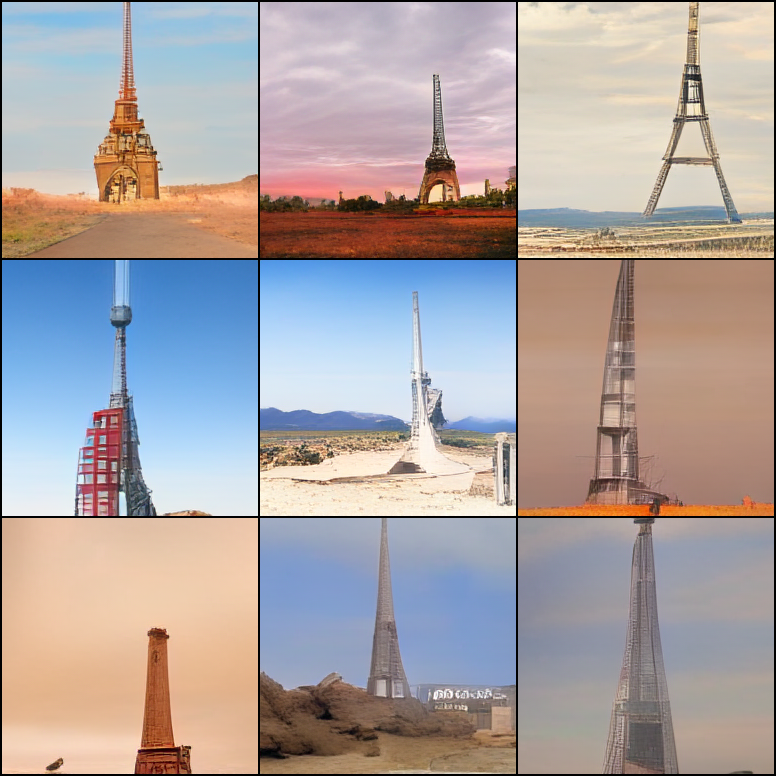

In [ ]:
text_prompts = 'the Eiffel Tower in the desert' # your own text
num_samples = 100
temperature= 1.0
top_k=1024
top_p=0.95

pixels = get_generated_images_by_texts(model_ar,
                                       model_vqvae,
                                       text_encoder,
                                       model_clip,
                                       preprocess_clip,
                                       text_prompts,
                                       num_samples,
                                       temperature,
                                       top_k,
                                       top_p,
                                      )

num_visualize_samples = 9
images = [pixel.cpu().numpy() * 0.5 + 0.5 for pixel in pixels]
images = torch.from_numpy(np.array(images[:num_visualize_samples]))
images = torch.clamp(images, 0, 1)
grid = torchvision.utils.make_grid(images, nrow=3)

img = Image.fromarray(np.uint8(grid.numpy().transpose([1,2,0])*255))
display(img)

In [ ]:
img.save(f'{text_prompts}_temp_{temperature}_top_k_{top_k}_top_p_{top_p}.jpg')